In [1]:
import os, glob
import math, copy, time

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm, trange

import numpy as np

import matplotlib
from matplotlib import pyplot as plt

from IPython.display import HTML
from IPython.display import display

from skeleton_models import ntu_rgbd, ntu_ss_1, ntu_ss_2, ntu_ss_3
from graph import Graph
from render import animate, save_animation
from datasets import NTUDataset

# Model components
from zoo_pose_embedding import TwoLayersGCNPoseEmbedding, JoaosDownsampling
from zoo_action_encoder_units import TransformerEncoderUnit
from zoo_action_decoder_units import TransformerDecoderUnit
from zoo_upsampling import StepByStepUpsampling, JoaosUpsampling
from model import ActionEmbeddingTransformer, SimplePoseEncoderDecoder
from layers import subsequent_mask

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
adjacency = Graph(ntu_rgbd)
conf_kernel_size = adjacency.A.shape[0]
conf_num_nodes = adjacency.A.shape[1]
conf_heads = 5
conf_encoding_per_node = 50
conf_internal_per_node = int(conf_encoding_per_node/conf_heads)


model = SimplePoseEncoderDecoder(
    JoaosDownsampling(
        conf_num_nodes,
        conf_encoding_per_node*conf_num_nodes,
        node_channel_in = 3,
        device=device
    ),
    JoaosUpsampling(
        conf_num_nodes,
        conf_encoding_per_node*conf_num_nodes,
        node_channel_out = 3,
        device=device
    )
)



Warn: not activated


In [ ]:
adjacency = Graph(ntu_rgbd)
conf_kernel_size = adjacency.A.shape[0]
conf_num_nodes = adjacency.A.shape[1]
conf_heads = 5
conf_encoding_per_node = 50
conf_internal_per_node = int(conf_encoding_per_node/conf_heads)


model = SimplePoseEncoderDecoder(
    TwoLayersGCNPoseEmbedding(
        3,
        conf_encoding_per_node,
        conf_kernel_size
    ),
    JoaosUpsampling(
        conf_num_nodes,
        conf_encoding_per_node*conf_num_nodes,
        node_channel_out = 3,
        device=device
    )
)



Using cpu


<ipython-input-4-fab4772d4bdc>:8: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(p)
Curr loss = 2.2175: 100%|██████████| 111/111 [25:53<00:00, 13.99s/it]


Epoch 0 loss = 2.2175395488739014


Curr loss = 1.9544: 100%|██████████| 111/111 [25:35<00:00, 13.83s/it]


Epoch 1 loss = 1.9544388055801392


Curr loss = 2.0855: 100%|██████████| 111/111 [24:22<00:00, 13.17s/it]


Epoch 2 loss = 2.0854952335357666


Curr loss = 1.6949: 100%|██████████| 111/111 [24:20<00:00, 13.16s/it]


Epoch 3 loss = 1.6948603391647339


Curr loss = 1.5221: 100%|██████████| 111/111 [24:42<00:00, 13.35s/it]


Epoch 4 loss = 1.522072672843933


Curr loss = 1.4389: 100%|██████████| 111/111 [26:25<00:00, 14.29s/it]


Epoch 5 loss = 1.4389293193817139


Curr loss = 1.6260: 100%|██████████| 111/111 [25:12<00:00, 13.63s/it]


Epoch 6 loss = 1.6260205507278442


Curr loss = 1.5008: 100%|██████████| 111/111 [29:51<00:00, 16.14s/it]


Epoch 7 loss = 1.500823974609375


Curr loss = 1.1896: 100%|██████████| 111/111 [24:13<00:00, 13.10s/it]


Epoch 8 loss = 1.1896106004714966


Curr loss = 1.0651: 100%|██████████| 111/111 [24:42<00:00, 13.36s/it]


Epoch 9 loss = 1.0651499032974243


Curr loss = 1.0006: 100%|██████████| 111/111 [25:18<00:00, 13.68s/it]
/mnt/hielo/projects/pesquisa/mestrado/action-embedding-transformer/render.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Epoch 10 loss = 1.0006113052368164


Curr loss = 0.8457: 100%|██████████| 111/111 [25:30<00:00, 13.79s/it]


Epoch 11 loss = 0.8456963896751404


Curr loss = 0.6828: 100%|██████████| 111/111 [25:13<00:00, 13.63s/it]


Epoch 12 loss = 0.6828317046165466


Curr loss = 0.6973: 100%|██████████| 111/111 [25:07<00:00, 13.59s/it]


Epoch 13 loss = 0.6973007321357727


Curr loss = 0.5807: 100%|██████████| 111/111 [25:49<00:00, 13.96s/it]


Epoch 14 loss = 0.5806810259819031


Curr loss = 0.6927: 100%|██████████| 111/111 [25:58<00:00, 14.04s/it]


Epoch 15 loss = 0.692742109298706


Curr loss = 0.5983: 100%|██████████| 111/111 [24:51<00:00, 13.43s/it]


Epoch 16 loss = 0.5983014702796936


Curr loss = 0.5162: 100%|██████████| 111/111 [25:31<00:00, 13.79s/it]


Epoch 17 loss = 0.5161614418029785


Curr loss = 0.3738: 100%|██████████| 111/111 [24:25<00:00, 13.20s/it]


Epoch 18 loss = 0.37375083565711975


Curr loss = 0.3156: 100%|██████████| 111/111 [24:35<00:00, 13.29s/it]


Epoch 19 loss = 0.3155826926231384


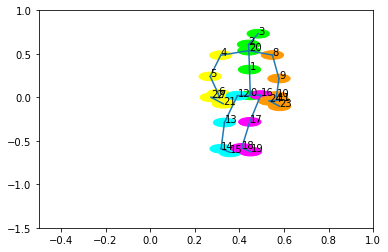

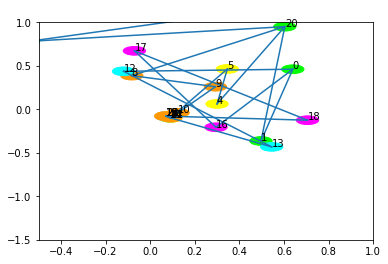

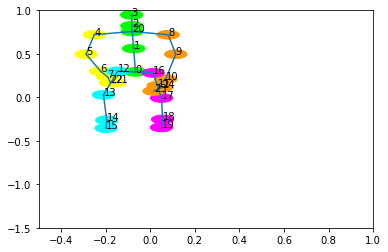

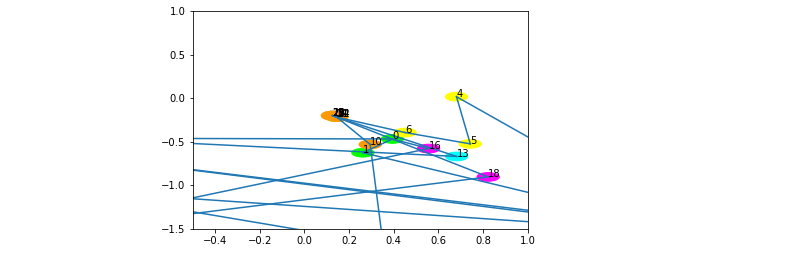

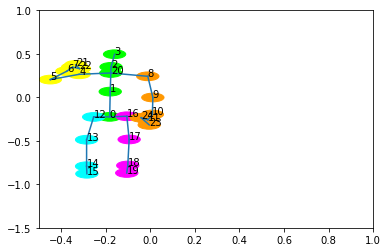

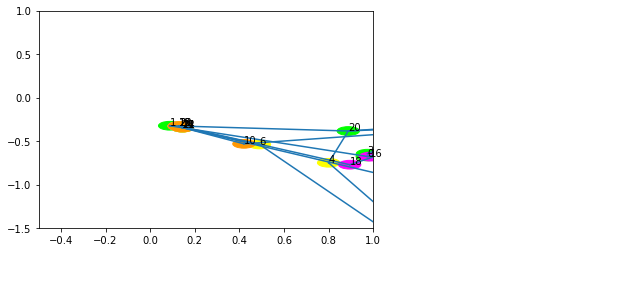

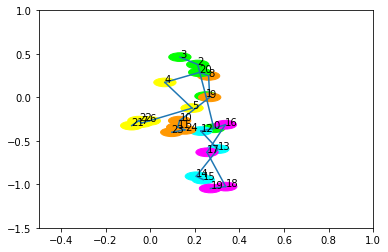

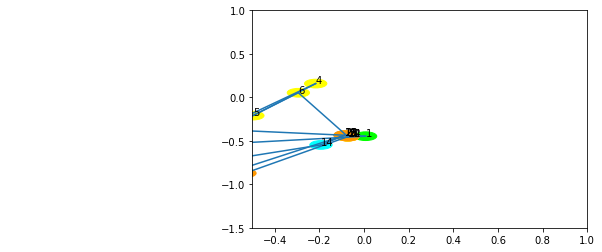

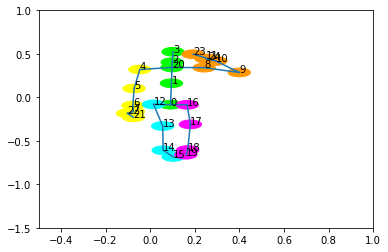

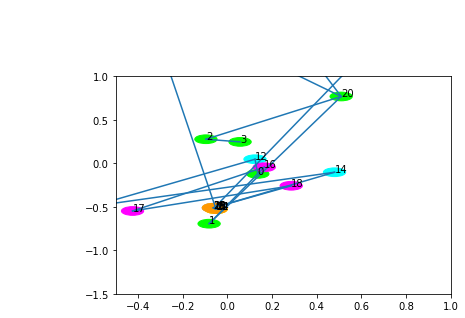

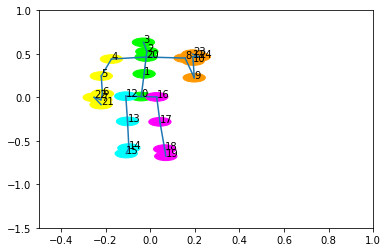

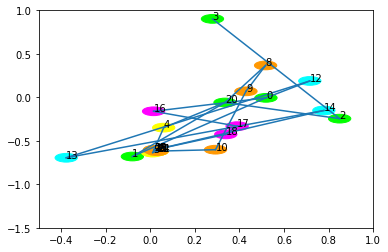

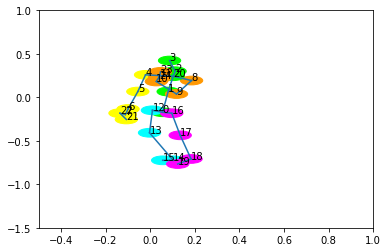

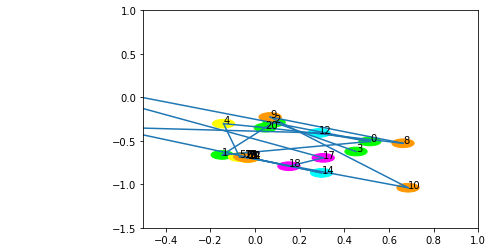

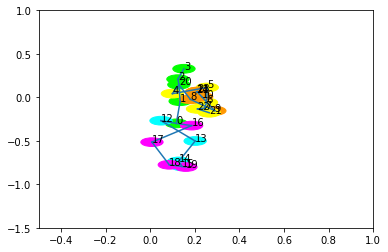

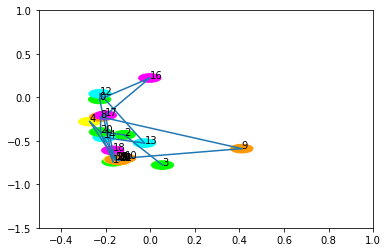

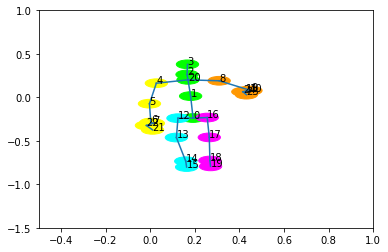

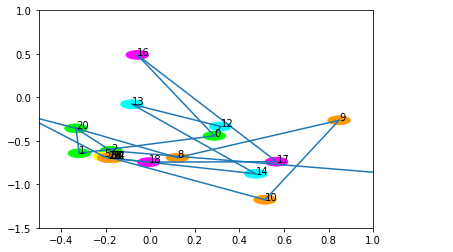

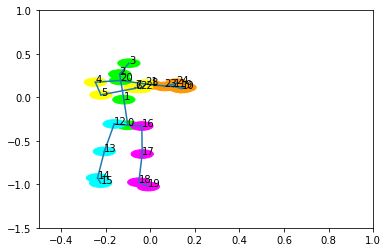

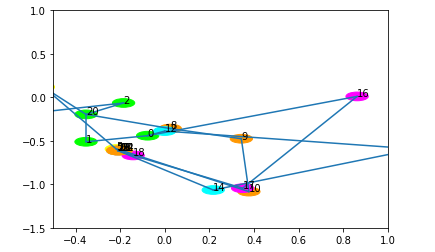

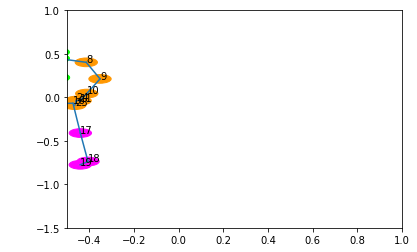

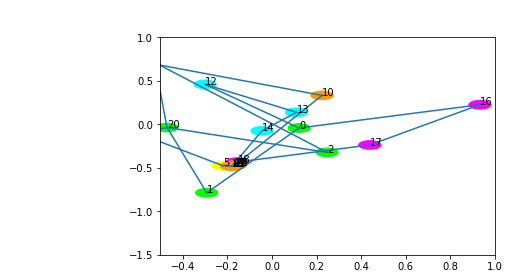

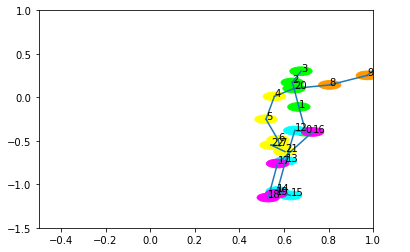

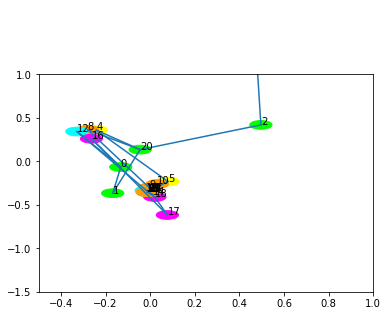

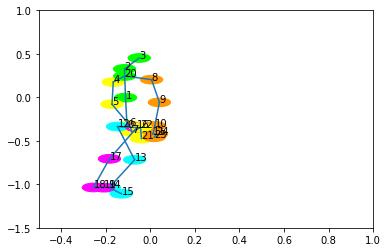

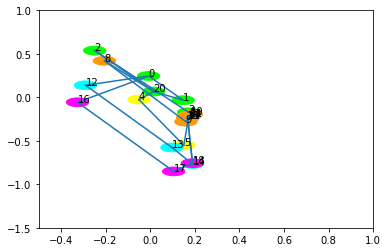

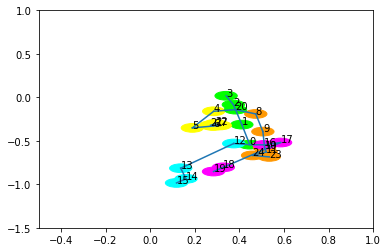

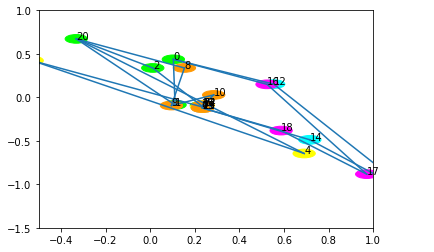

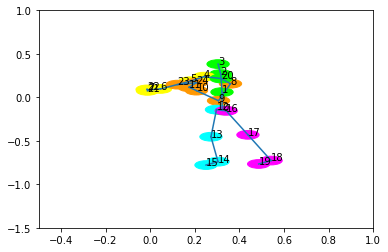

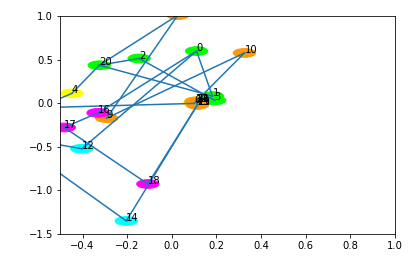

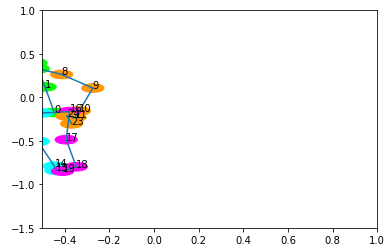

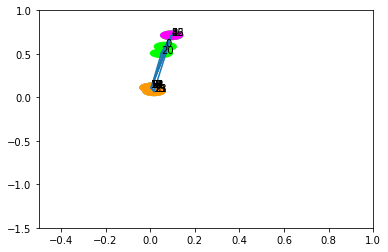

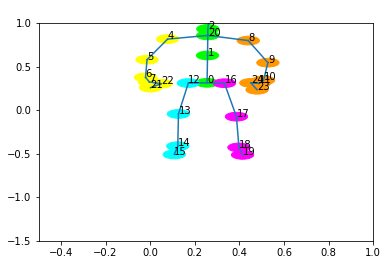

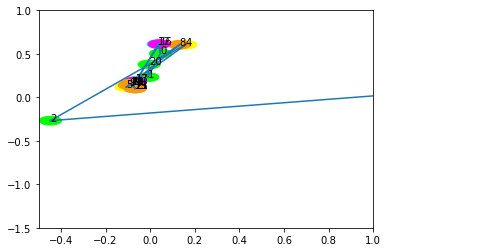

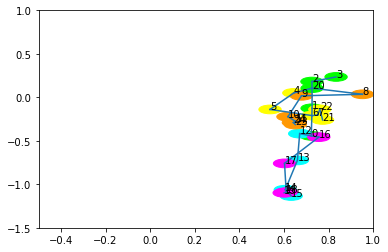

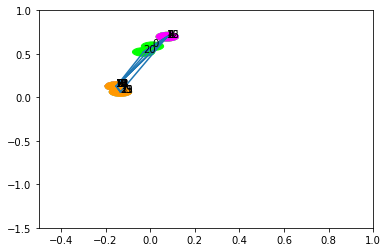

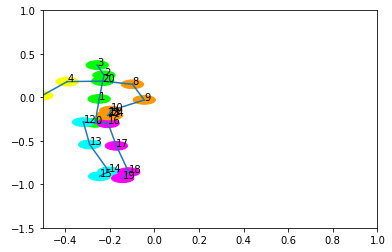

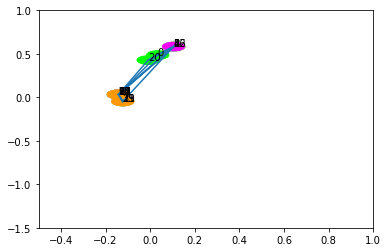

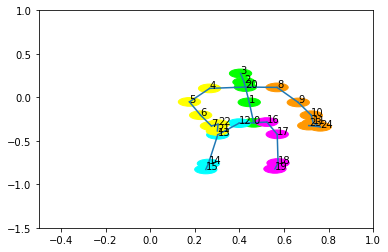

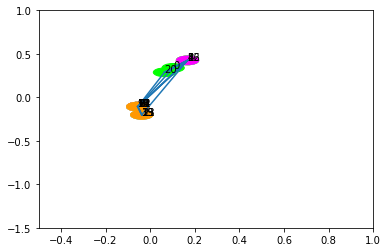

In [4]:
print('Using {}'.format(device))

A = torch.from_numpy(adjacency.A).to(device, dtype=torch.float)
model = model.to(device)

for p in model.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform(p)

criterion = torch.nn.MSELoss()

#ntu_dataset = NTUDataset(root_dir='../ntu-rgbd-dataset/Python/raw_npy/')
ntu_dataset = NTUDataset(root_dir='../datasets/NTURGB-D/Python/raw_npy/')
loader = DataLoader(ntu_dataset, batch_size=512, shuffle=True)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.00005)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)





for epoch in range(20):
    pbar = tqdm(loader, desc='Initializing ...')
    for data in pbar:
        data = data.to(device, dtype=torch.float)

        n_out, c_out, t_out, v_out = data.size()
        mask = subsequent_mask(t_out).to(device, dtype=torch.float)

        out = model(data, A)

        loss = criterion(out, data)
        loss.backward()

        # update parameters
        optimizer.step()
        pbar.set_description("Curr loss = {:.4f}".format(loss.item()))

    print('Epoch {} loss = {}'.format(epoch, loss.item()))
    torch.save(model.state_dict(), 'outputs/models/simple_encoder_epoch_{}.pth'.format(epoch))
    save_animation(data[0], ntu_rgbd, 'outputs/animations/sample_example_epoch_{}.gif'.format(epoch))
    save_animation(out[0], ntu_rgbd, 'outputs/animations/out_example_epoch_{}.gif'.format(epoch))